In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 8s 4us/step


In [3]:
print(len(train_data), 'train samples.')
print(len(test_data), 'test samples.')

8982 train samples.
2246 test samples.


In [10]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
# Decode news
word_index = reuters.get_word_index()
reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])
decoded_news = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [9]:
decoded_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
# Определение эпохи, после которой модель переобучается
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 144us/step - loss: 2.5439 - acc: 0.5596 - val_loss: 1.7012 - val_acc: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.3937 - acc: 0.7175 - val_loss: 1.3019 - val_acc: 0.7140
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.0390 - acc: 0.7814 - val_loss: 1.1303 - val_acc: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.8078 - acc: 0.8311 - val_loss: 1.0393 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.6431 - acc: 0.8671 - val_loss: 0.9860 - val_acc: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.5097 - acc: 0.8956 - val_loss: 0.9584 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.4089 - acc: 0.9159 - val_loss: 0.9204 - val_acc: 0.8090


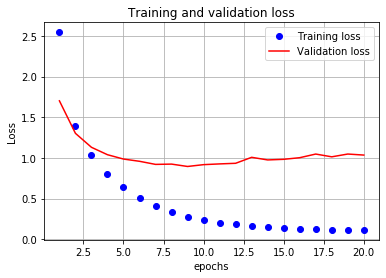

In [19]:
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

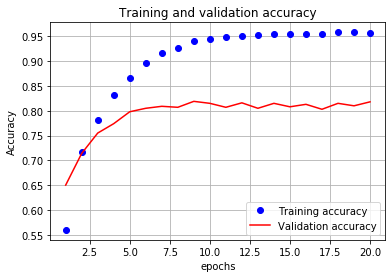

In [20]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [21]:
# Создаем и обучаем модель нужное количество эпох (9)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results
# точнность модели ~78%

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 140us/step - loss: 2.6627 - acc: 0.5296 - val_loss: 1.7175 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.4085 - acc: 0.7111 - val_loss: 1.3093 - val_acc: 0.7300
Epoch 3/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.0512 - acc: 0.7799 - val_loss: 1.1466 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.8271 - acc: 0.8260 - val_loss: 1.0524 - val_acc: 0.7730
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.6623 - acc: 0.8633 - val_loss: 0.9841 - val_acc: 0.7830
Epoch 6/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.5341 - acc: 0.8910 - val_loss: 0.9308 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 114us/step - loss: 0.4239 - acc: 0.9129 - val_loss: 0.9346 - val_acc: 0.8020
Epoch 8

[1.0184570804623123, 0.7836153161440804]

In [24]:
# Точность случайной классификации ~19%
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_arr = np.array(test_labels) == np.array(test_labels_copy)
float(sum(hits_arr)) / len(test_labels)

0.19278717720391808

In [25]:
y_hat = model.predict(x_test)

In [30]:
np.argmax(y_hat[0])

4